In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
df = pd.read_csv('Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [3]:
df1=df[df.columns.difference(['Email', "Address", 'Avatar'])]
df1

,Avg Session Length,Length of Membership,Time on App,Time on Website,Yearly Amount Spent
0,34.497268,4.082621,12.655651,39.577668,587.951054
1,31.926272,2.664034,11.109461,37.268959,392.204933
2,33.000915,4.104543,11.330278,37.110597,487.547505
3,34.305557,3.120179,13.717514,36.721283,581.852344
4,33.330673,4.446308,12.795189,37.536653,599.406092
...,...,...,...,...,...
495,33.237660,3.746573,13.566160,36.417985,573.847438
496,34.702529,3.576526,11.695736,37.190268,529.049004
497,32.646777,4.958264,11.499409,38.332576,551.620145
498,33.322501,2.336485,12.391423,36.840086,456.469510


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(18.125, 0.5, 'Yearly Amount Spent')

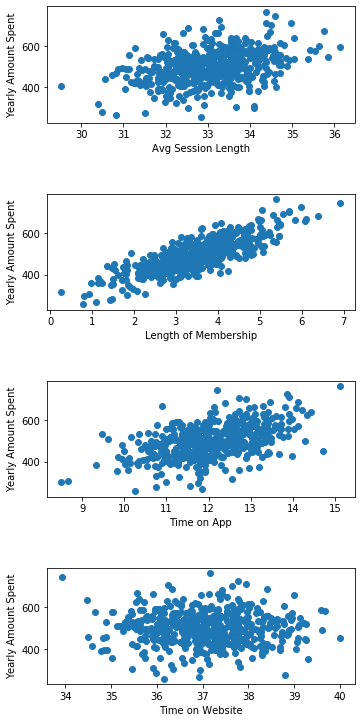

In [4]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df1['Avg Session Length'], df1['Yearly Amount Spent'])
axs[0].set_xlabel('Avg Session Length')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(df['Length of Membership'], df1['Yearly Amount Spent'])
axs[1].set_xlabel('Length of Membership')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(df['Time on App'], df1['Yearly Amount Spent'])
axs[2].set_xlabel('Time on App')
axs[2].set_ylabel('Yearly Amount Spent')

axs[3].scatter(df['Time on Website'], df1['Yearly Amount Spent'])
axs[3].set_xlabel('Time on Website')
axs[3].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [5]:
df=df1[['Length of Membership','Yearly Amount Spent']]
df

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


### Divide the dataset into training and test sets with the ratio 80:20.

In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=42)


### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [7]:
def fit_1d_linear_regression(data_vector, response_vector):
 
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    import numpy as np
    col_ones = np.ones([data_vector.shape[0], 1])
    data_vector = np.hstack((col_ones, data_vector))
    inv=np.linalg.inv(np.dot(data_vector.T, data_vector ))
    b=np.dot(np.dot(inv, data_vector.T), response_vector)
    
    return b

    
fit_1d_linear_regression(xTrain, yTrain) 

array([271.3521128 ,  64.64010065])

In [8]:
from sklearn.model_selection import train_test_split
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(df1[df1.columns.difference(['Yearly Amount Spent'])],df1['Yearly Amount Spent'], test_size=0.2, random_state=42)


In [9]:
fit_1d_linear_regression(xTrain1, yTrain1) 

array([-1.04425741e+03,  2.55962591e+01,  6.18968286e+01,  3.87853460e+01,
        3.10385933e-01])

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

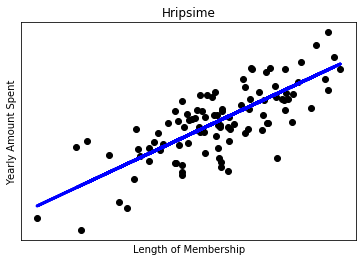

<Figure size 432x288 with 0 Axes>

In [10]:
def plot_fitted_line(b1, x, y, username: str,b0 = 0):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    import numpy as np
    col_ones = np.ones([x.shape[0], 1])
    data_vector = np.hstack((col_ones, x))
    y_pred = np.dot(data_vector, fit_1d_linear_regression(xTrain, yTrain).T )
    plt.scatter(x, y,  color='black')
    plt.plot(x,y_pred , color='blue', linewidth=3)

    plt.xlabel(x.columns[0])
    plt.ylabel(y.name)
    plt.title(username)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    plt.savefig('%s.png'%username)

plot_fitted_line(b0=fit_1d_linear_regression(xTrain, yTrain)[0],b1=fit_1d_linear_regression(xTrain, yTrain)[1],x=xTest, y=yTest,username='Hripsime')


### Plot example

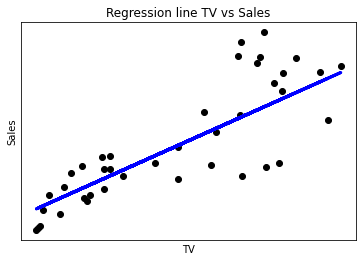

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [11]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(xTrain, yTrain)
regr.coef_, regr.intercept_ 

(array([64.64010065]), 271.35211280339314)

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [12]:
#With my function
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

col_ones = np.ones([xTest.shape[0], 1])
data_vector = np.hstack((col_ones, xTest))
y_pred = np.dot(data_vector, fit_1d_linear_regression(xTrain, yTrain).T )
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56


In [13]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)
y_pred = regr.predict(xTest)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [14]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain1, yTrain1)
y_pred1 = regr.predict(xTest1)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest1, y_pred1))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest1, y_pred1))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest1, y_pred1)))

print('R-squared: %.2f'
      % r2_score(yTest1, y_pred1))

Mean absolute error: 8.56
Mean squared error: 109.86
Root mean squared error: 10.48
R-squared: 0.98


In [15]:
#With my function
col_ones = np.ones([xTest1.shape[0], 1])
data_vector = np.hstack((col_ones, xTest1))
y_pred2 = np.dot(data_vector, fit_1d_linear_regression(xTrain1, yTrain1).T )
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest1, y_pred2))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest1, y_pred2))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest1, y_pred2)))

print('R-squared: %.2f'
      % r2_score(yTest1, y_pred2))

Mean absolute error: 8.56
Mean squared error: 109.86
Root mean squared error: 10.48
R-squared: 0.98
